# Import Required Libraries
Import the necessary libraries for data analysis and visualization, including pandas, matplotlib, seaborn, and plotly.

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

# Load the Combined Report Data
Load the combined_report.json file into a pandas DataFrame and examine its structure, including document information and processing metrics.

In [2]:
# Load the Combined Report Data
with open('/home/azureuser/academic-document-analyzer/nb/Profile_pipeline/combined_report.json', 'r') as file:
    combined_report = json.load(file)

# Convert the combined report to a pandas DataFrame
documents_df = pd.DataFrame(combined_report['documents'])

# Display the structure of the DataFrame
documents_df.head()

# Display summary statistics of the DataFrame
documents_df.describe()

# Display the overall metrics from the combined report
overall_metrics = {key: combined_report[key] for key in combined_report if key != 'documents'}
overall_metrics

{'total_documents': 2,
 'total_pages': 51,
 'total_time_seconds': 246.1880795955658,
 'total_nougat_images': 36,
 'total_images': 16,
 'total_tables': 24,
 'total_time_formatted': '4m 6.19s',
 'avg_pages_per_document': 25.5,
 'avg_processing_time_per_document': 123.0940397977829,
 'avg_nougat_images_per_document': 18.0,
 'avg_images_per_document': 8.0,
 'avg_tables_per_document': 12.0,
 'avg_processing_time_per_page': 4.827217246971879,
 'report_generated': '2025-03-08 07:59:49'}

# Calculate Processing Statistics
Calculate additional statistics about pipeline performance such as processing time per element, time distribution across documents, and throughput metrics.

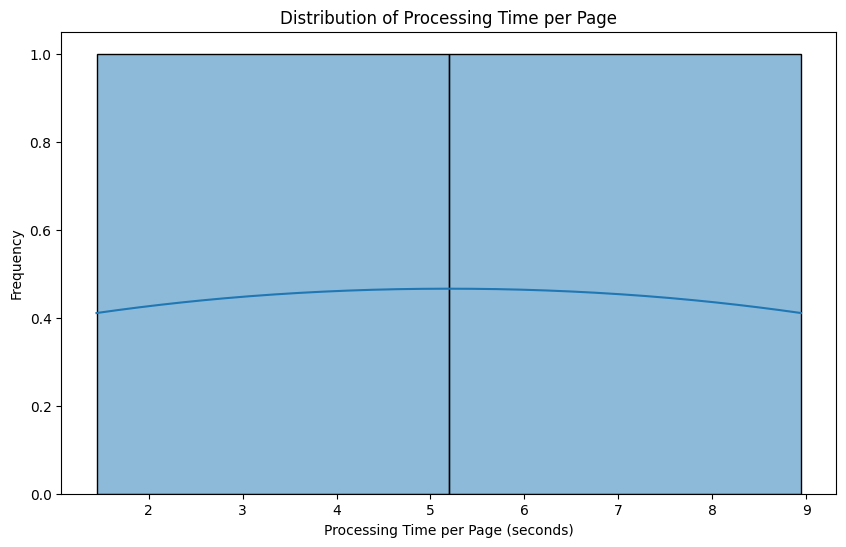

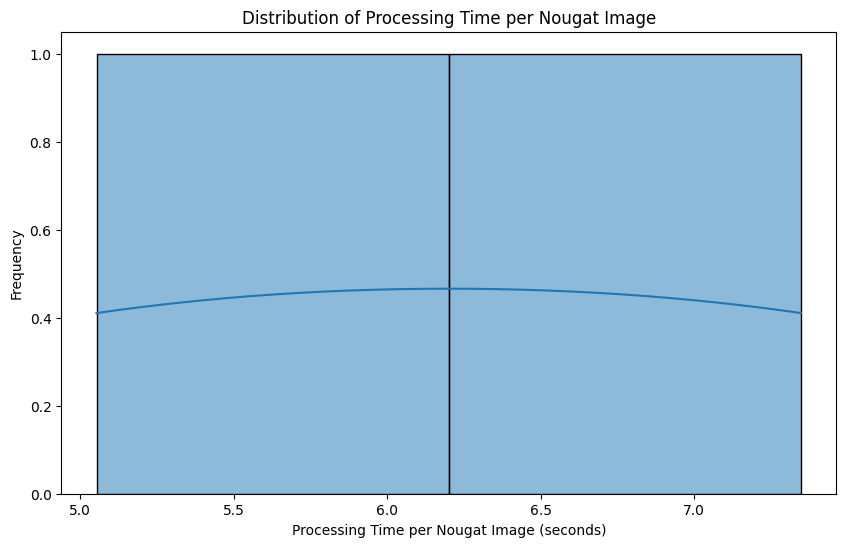

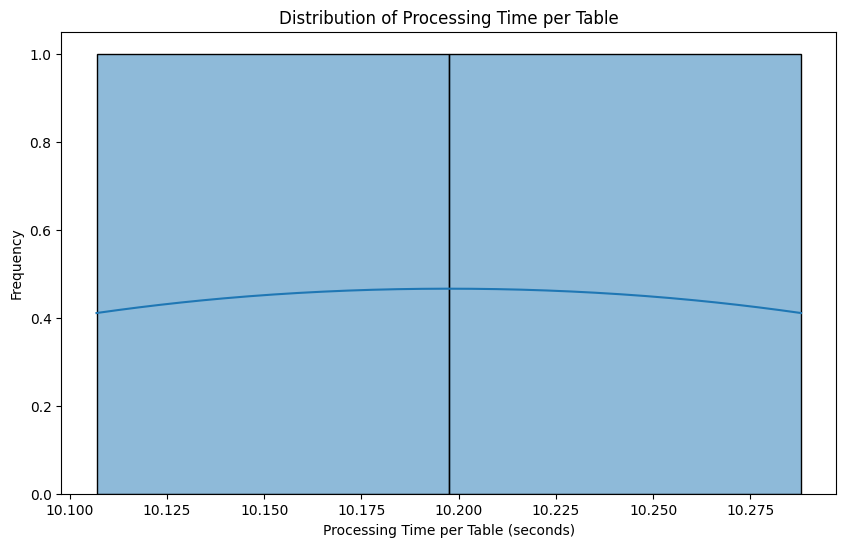

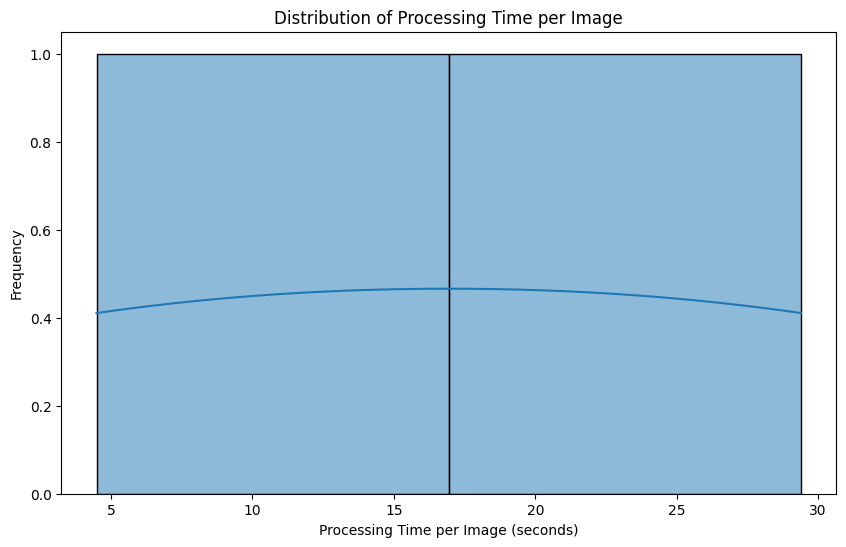

{'documents_per_second': 0.0081238701861015,
 'pages_per_second': 0.20715868974558824,
 'nougat_images_per_second': 0.146229663349827,
 'images_per_second': 0.064990961488812,
 'tables_per_second': 0.09748644223321801}

In [3]:
# Calculate Processing Statistics

# Calculate processing time per page
documents_df['processing_time_per_page'] = documents_df['processing_time_seconds'] / documents_df['pages']

# Calculate processing time per nougat image
documents_df['processing_time_per_nougat_image'] = documents_df['processing_time_seconds'] / documents_df['nougat_images']

# Calculate processing time per table
documents_df['processing_time_per_table'] = documents_df['processing_time_seconds'] / documents_df['tables']

# Calculate processing time per image
documents_df['processing_time_per_image'] = documents_df['processing_time_seconds'] / documents_df['images']

# Display the updated DataFrame with new statistics
documents_df.head()

# Plot the distribution of processing time per page
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_page'], kde=True)
plt.title('Distribution of Processing Time per Page')
plt.xlabel('Processing Time per Page (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of processing time per nougat image
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_nougat_image'], kde=True)
plt.title('Distribution of Processing Time per Nougat Image')
plt.xlabel('Processing Time per Nougat Image (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of processing time per table
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_table'], kde=True)
plt.title('Distribution of Processing Time per Table')
plt.xlabel('Processing Time per Table (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of processing time per image
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_image'], kde=True)
plt.title('Distribution of Processing Time per Image')
plt.xlabel('Processing Time per Image (seconds)')
plt.ylabel('Frequency')
plt.show()

# Calculate throughput metrics
total_documents = overall_metrics['total_documents']
total_pages = overall_metrics['total_pages']
total_time_seconds = overall_metrics['total_time_seconds']
total_nougat_images = overall_metrics['total_nougat_images']
total_images = overall_metrics['total_images']
total_tables = overall_metrics['total_tables']

throughput_metrics = {
    'documents_per_second': total_documents / total_time_seconds,
    'pages_per_second': total_pages / total_time_seconds,
    'nougat_images_per_second': total_nougat_images / total_time_seconds,
    'images_per_second': total_images / total_time_seconds,
    'tables_per_second': total_tables / total_time_seconds
}

# Display throughput metrics
throughput_metrics

# Visualize Processing Time
Create visualizations showing the distribution of processing time across documents and the relationship between document size (pages) and processing time.

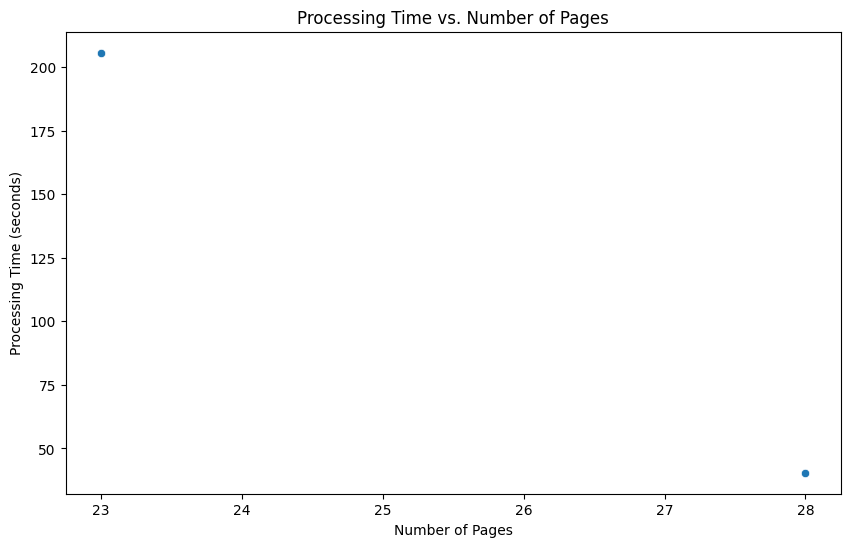

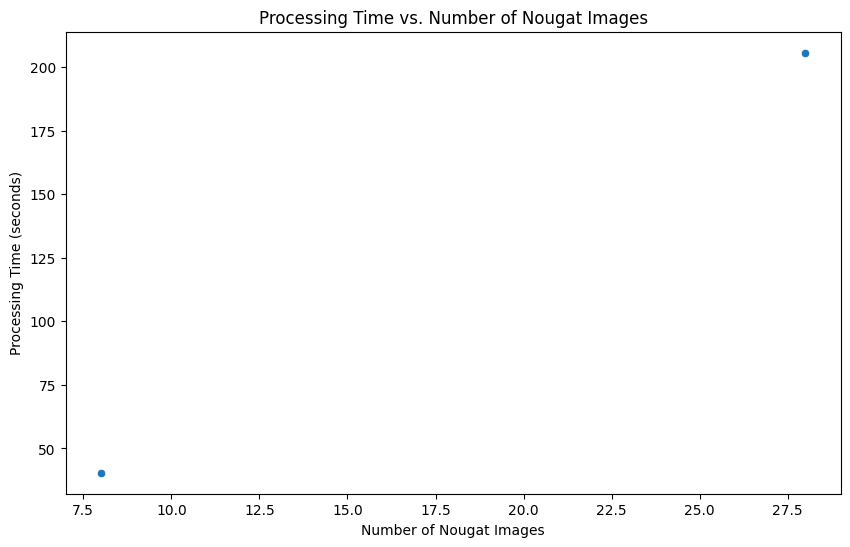

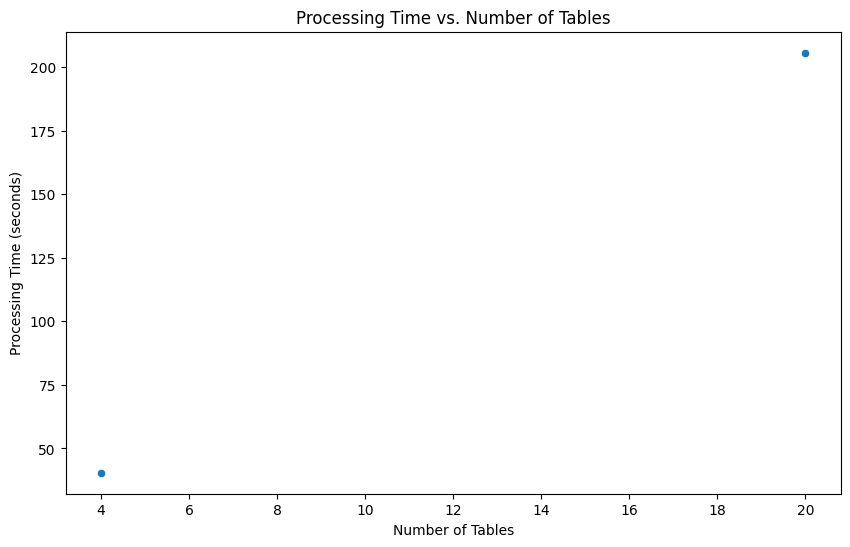

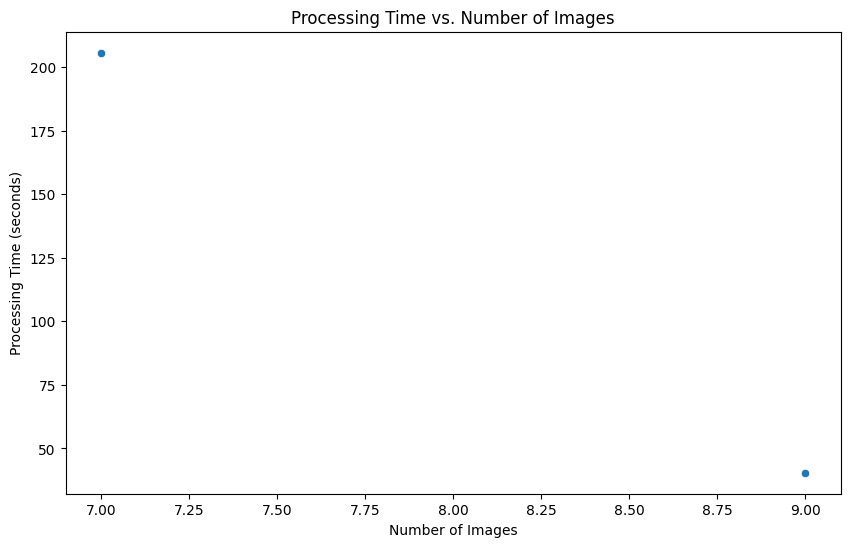

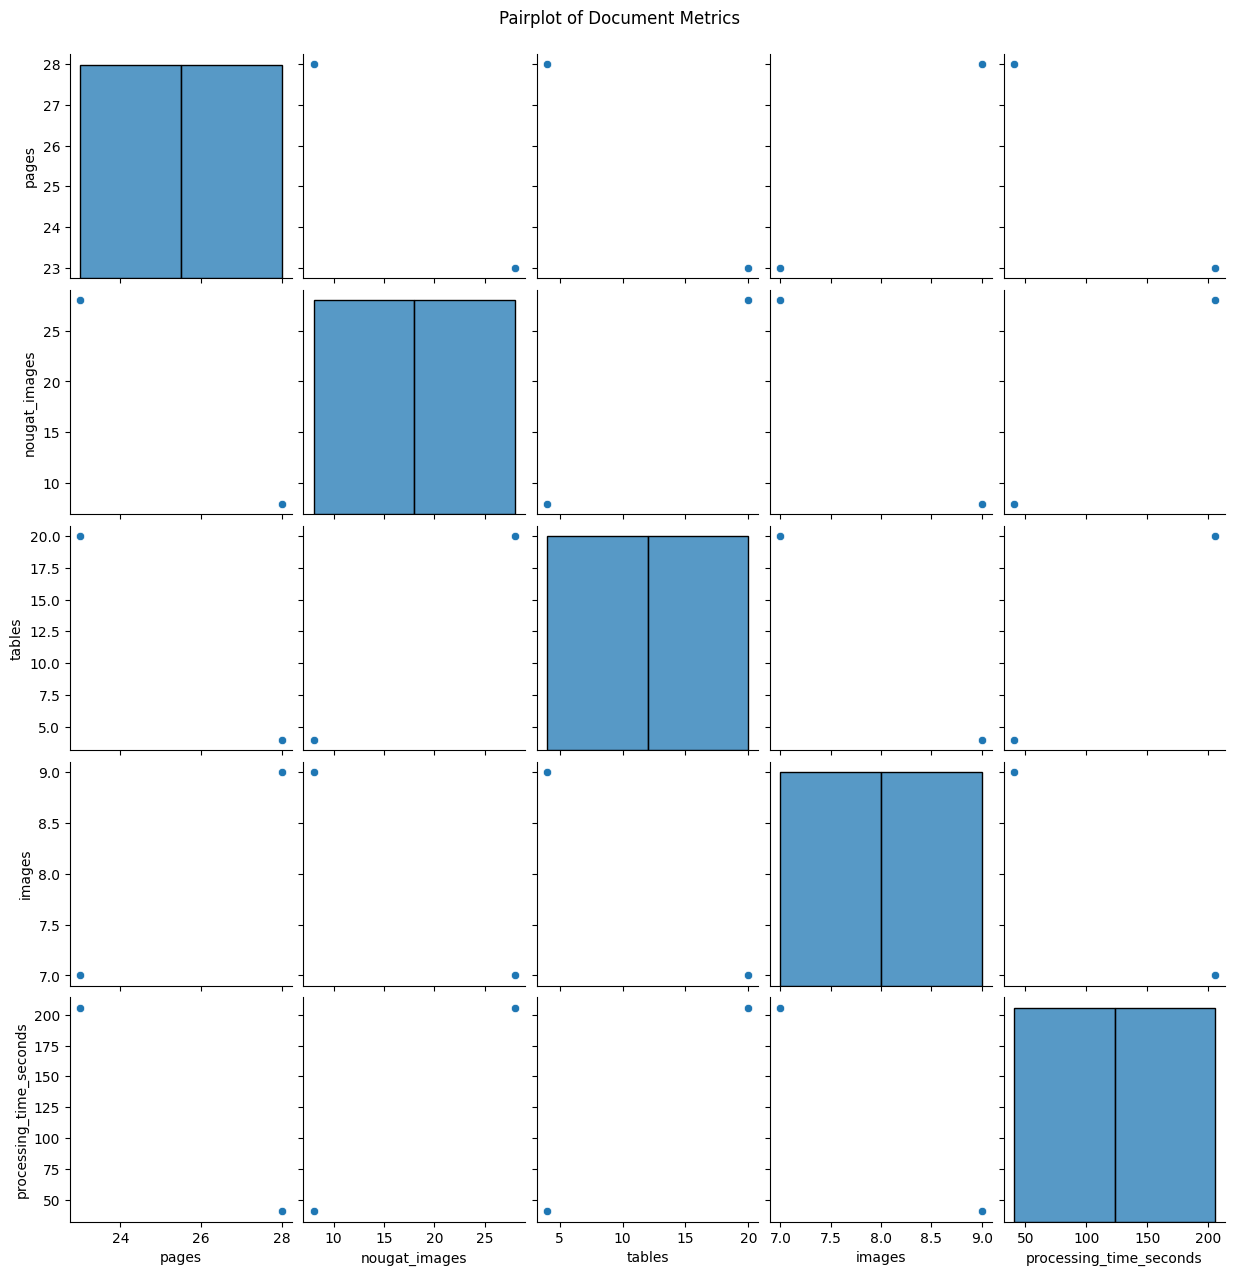

In [4]:
# Visualize Processing Time

# Scatter plot of processing time vs. number of pages
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pages', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Scatter plot of processing time vs. number of nougat images
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nougat_images', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Nougat Images')
plt.xlabel('Number of Nougat Images')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Scatter plot of processing time vs. number of tables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tables', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Tables')
plt.xlabel('Number of Tables')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Scatter plot of processing time vs. number of images
plt.figure(figsize=(10, 6))
sns.scatterplot(x='images', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Pairplot to visualize relationships between different metrics
sns.pairplot(documents_df, vars=['pages', 'nougat_images', 'tables', 'images', 'processing_time_seconds'])
plt.suptitle('Pairplot of Document Metrics', y=1.02)
plt.show()

# Analyze Element Extraction
Compare the distribution of extracted elements (images, tables, nougat_images) across documents and visualize the extraction density per page.

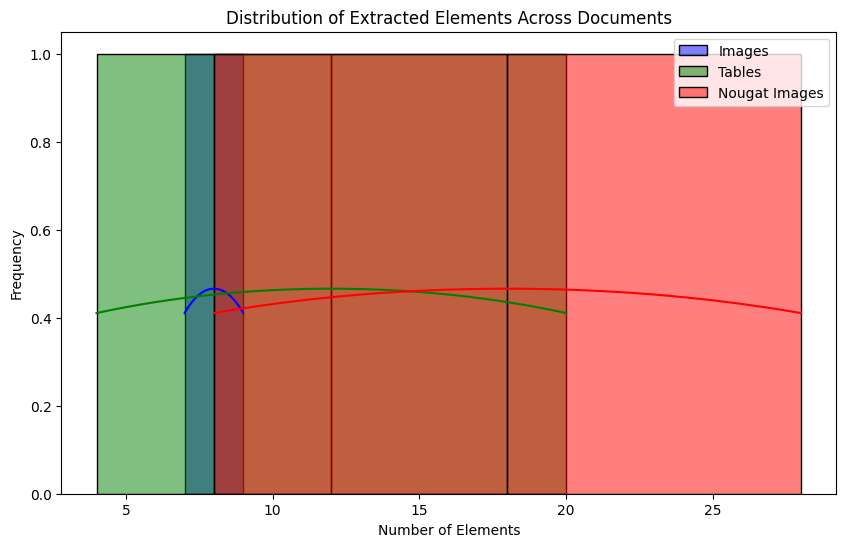

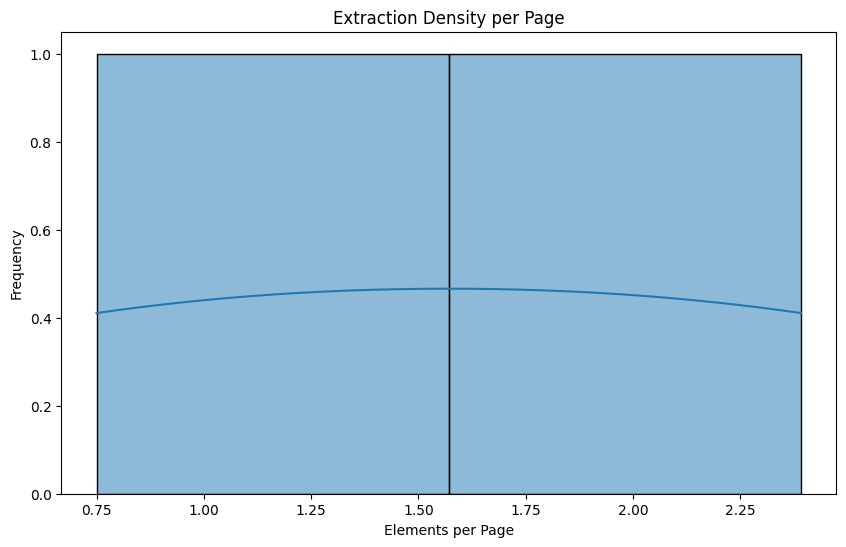

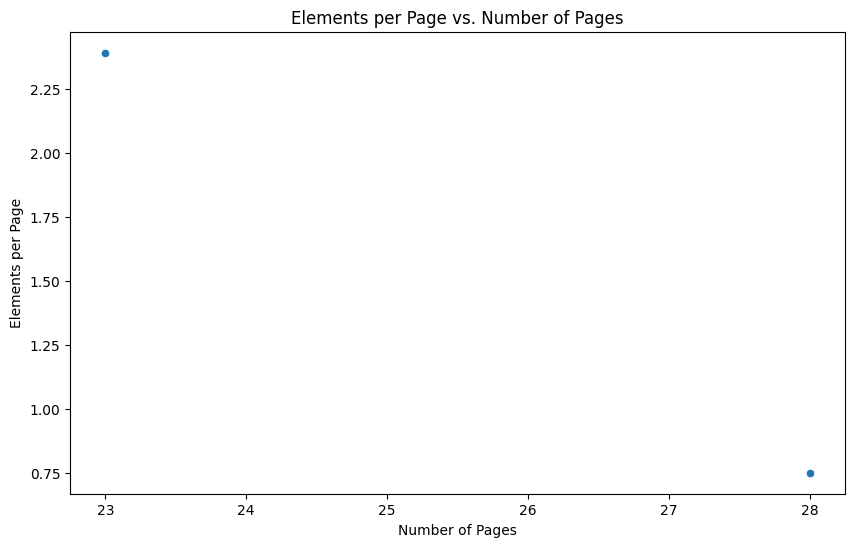

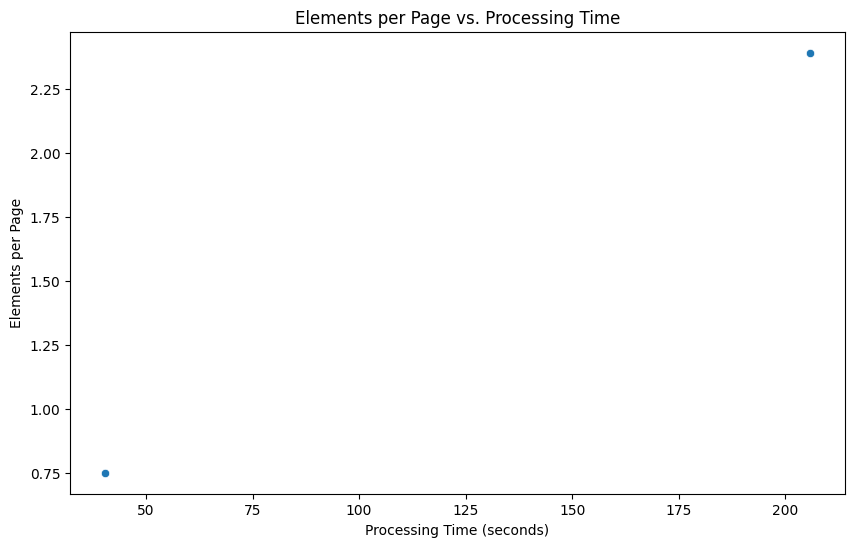

In [5]:
# Analyze Element Extraction

# Compare the distribution of extracted elements (images, tables, nougat_images) across documents
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['images'], kde=True, color='blue', label='Images')
sns.histplot(documents_df['tables'], kde=True, color='green', label='Tables')
sns.histplot(documents_df['nougat_images'], kde=True, color='red', label='Nougat Images')
plt.title('Distribution of Extracted Elements Across Documents')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize the extraction density per page
documents_df['elements_per_page'] = (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images']) / documents_df['pages']

plt.figure(figsize=(10, 6))
sns.histplot(documents_df['elements_per_page'], kde=True)
plt.title('Extraction Density per Page')
plt.xlabel('Elements per Page')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of elements per page vs. number of pages
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pages', y='elements_per_page', data=documents_df)
plt.title('Elements per Page vs. Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Elements per Page')
plt.show()

# Scatter plot of elements per page vs. processing time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_seconds', y='elements_per_page', data=documents_df)
plt.title('Elements per Page vs. Processing Time')
plt.xlabel('Processing Time (seconds)')
plt.ylabel('Elements per Page')
plt.show()

# Compare Document Processing
Create comparative visualizations between documents showing processing efficiency and element extraction performance.

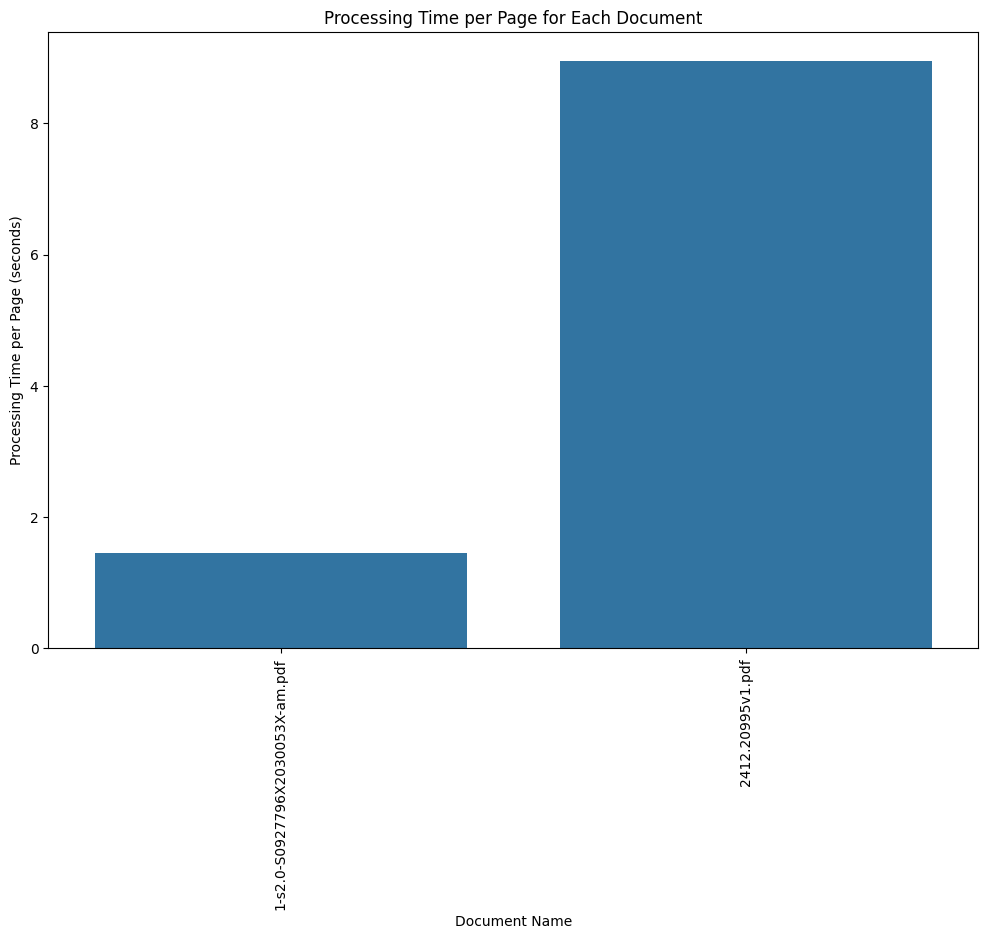

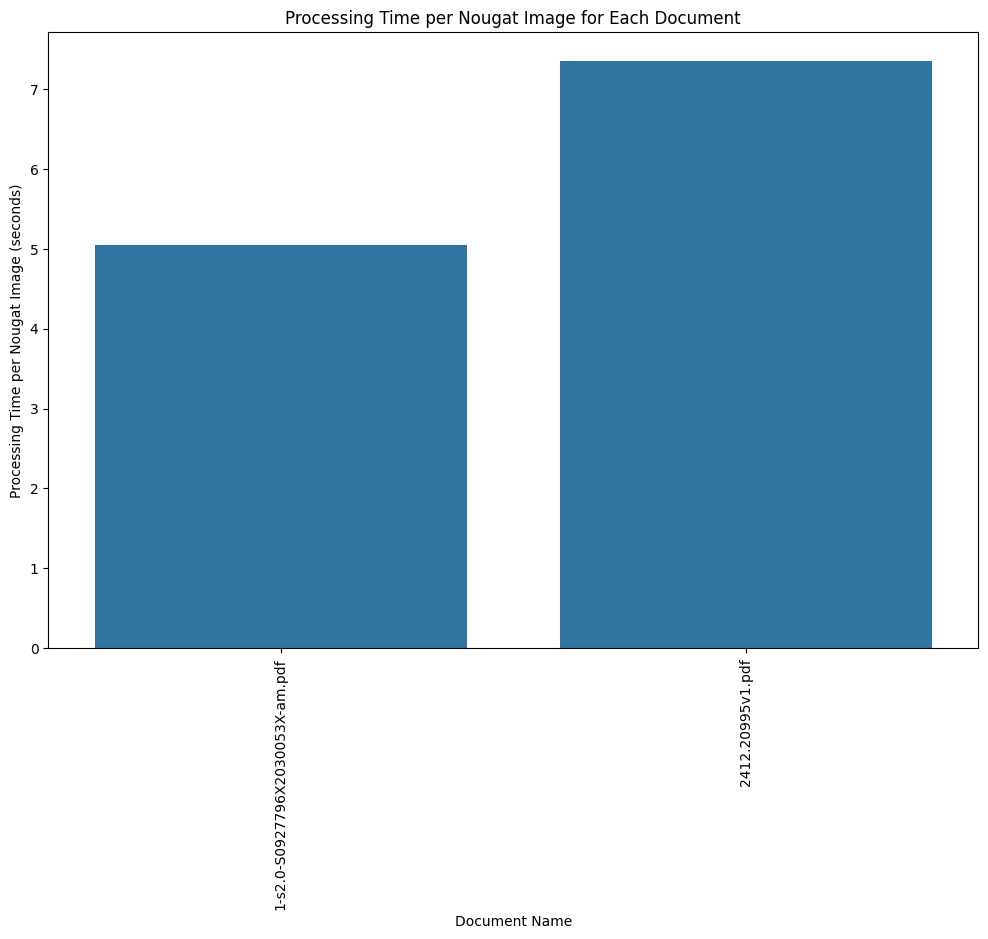

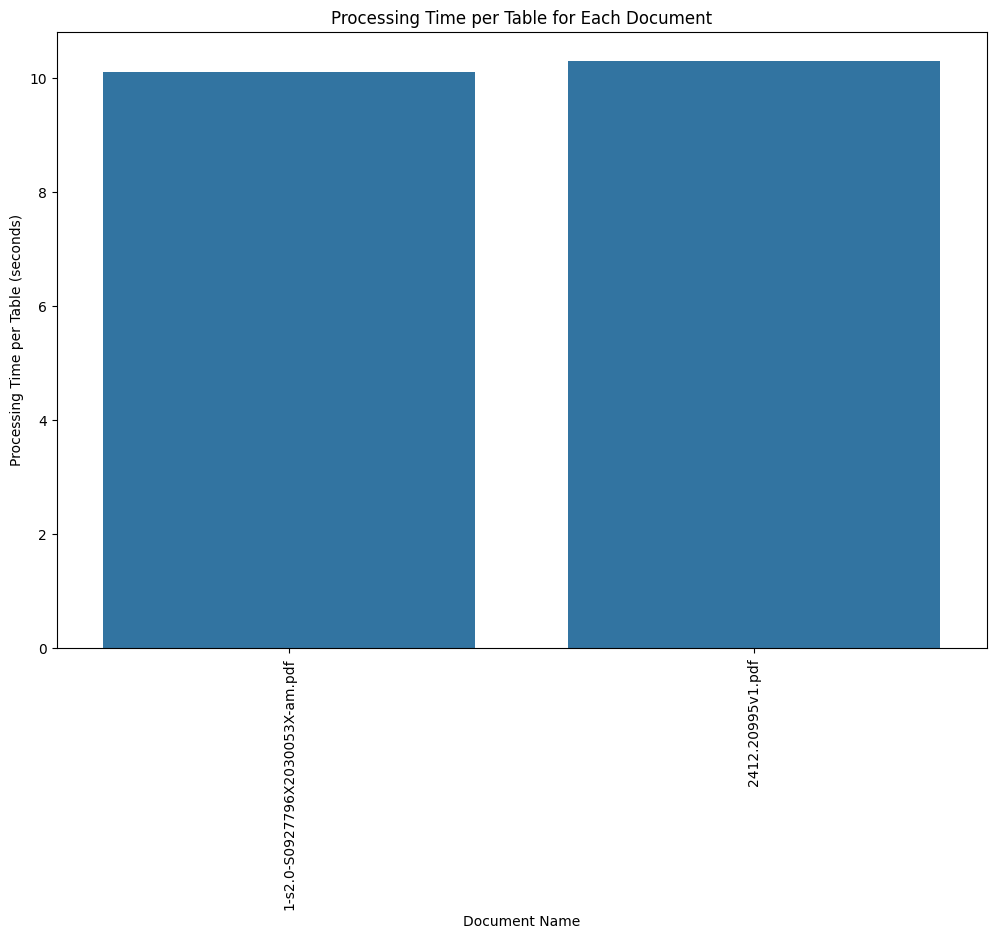

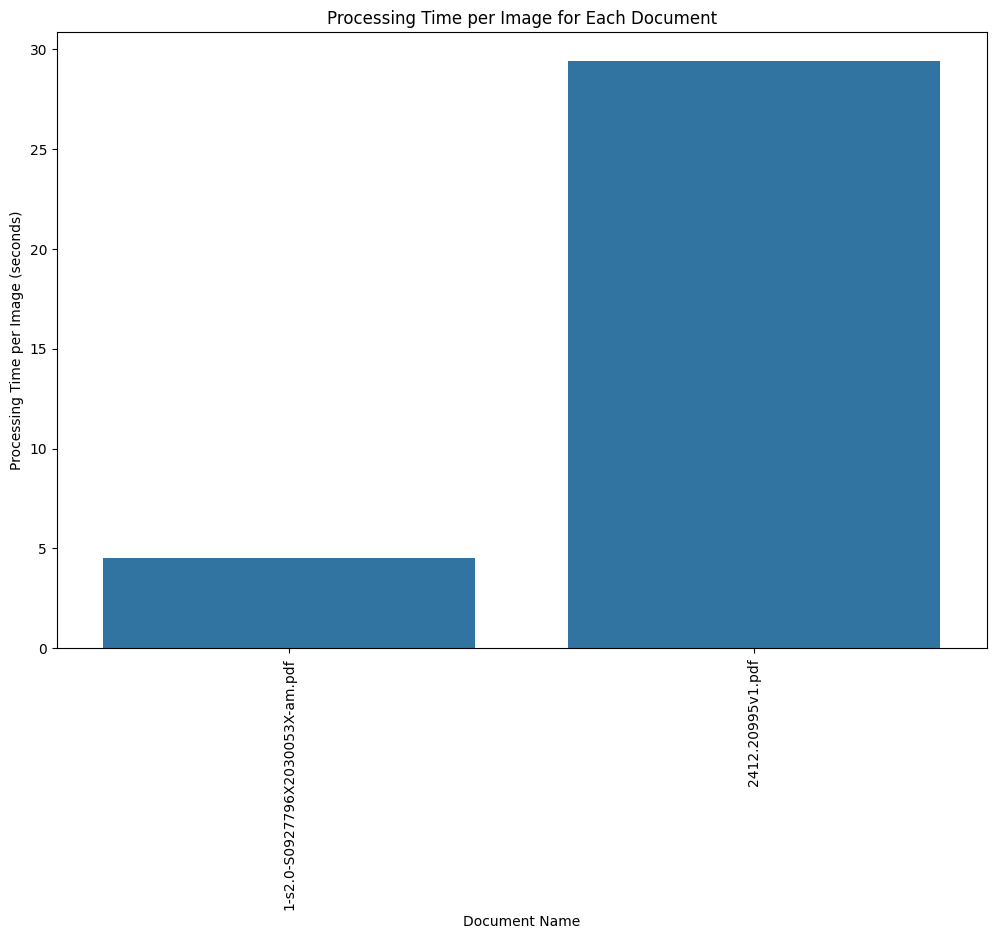

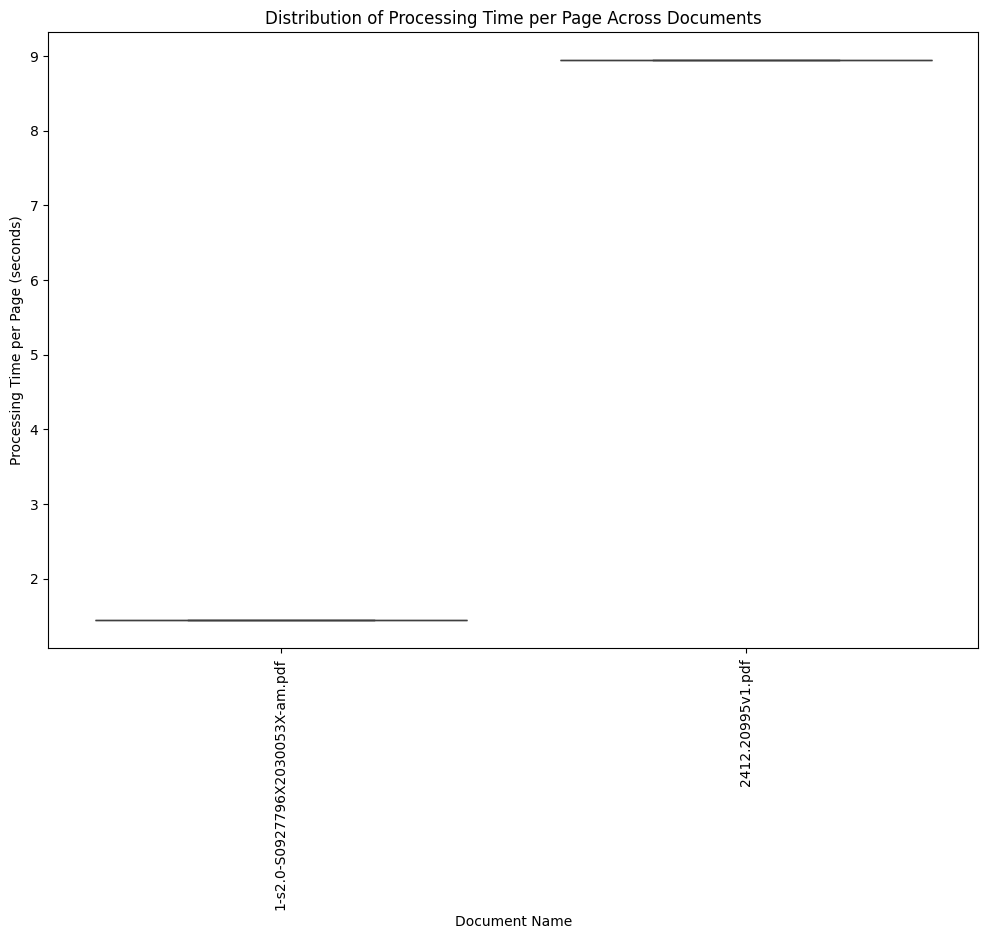

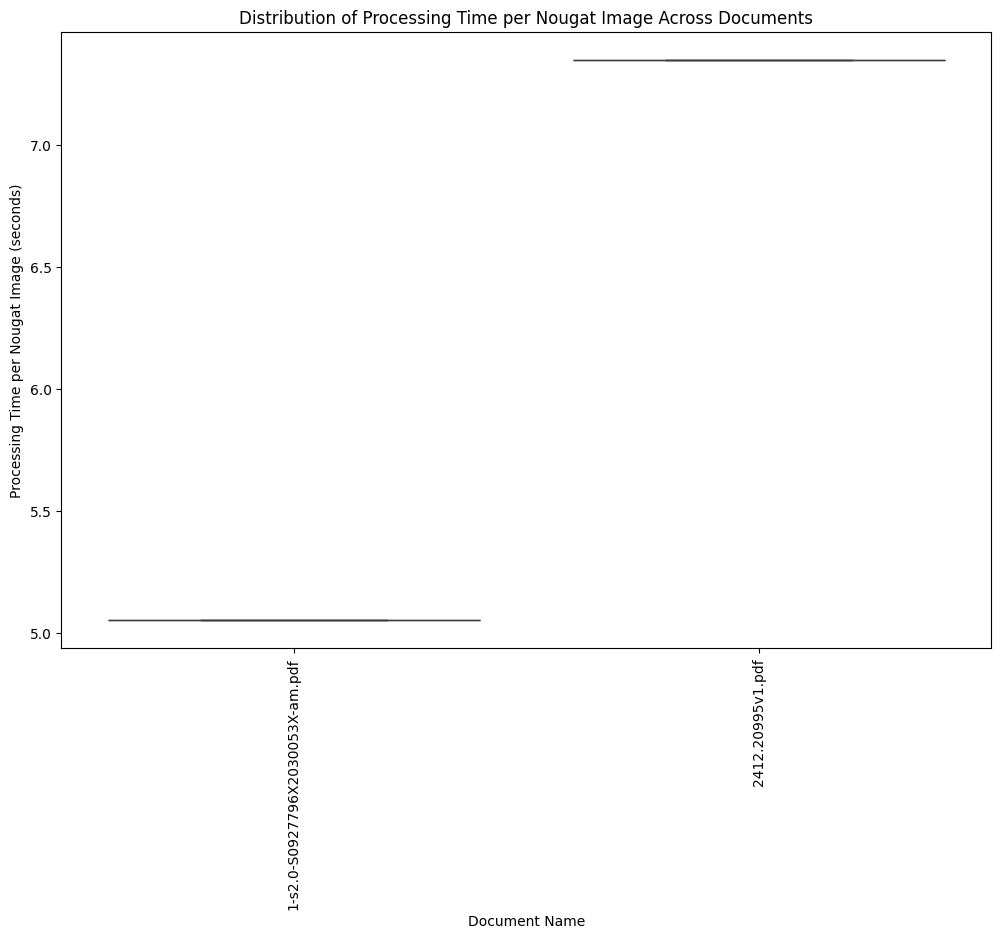

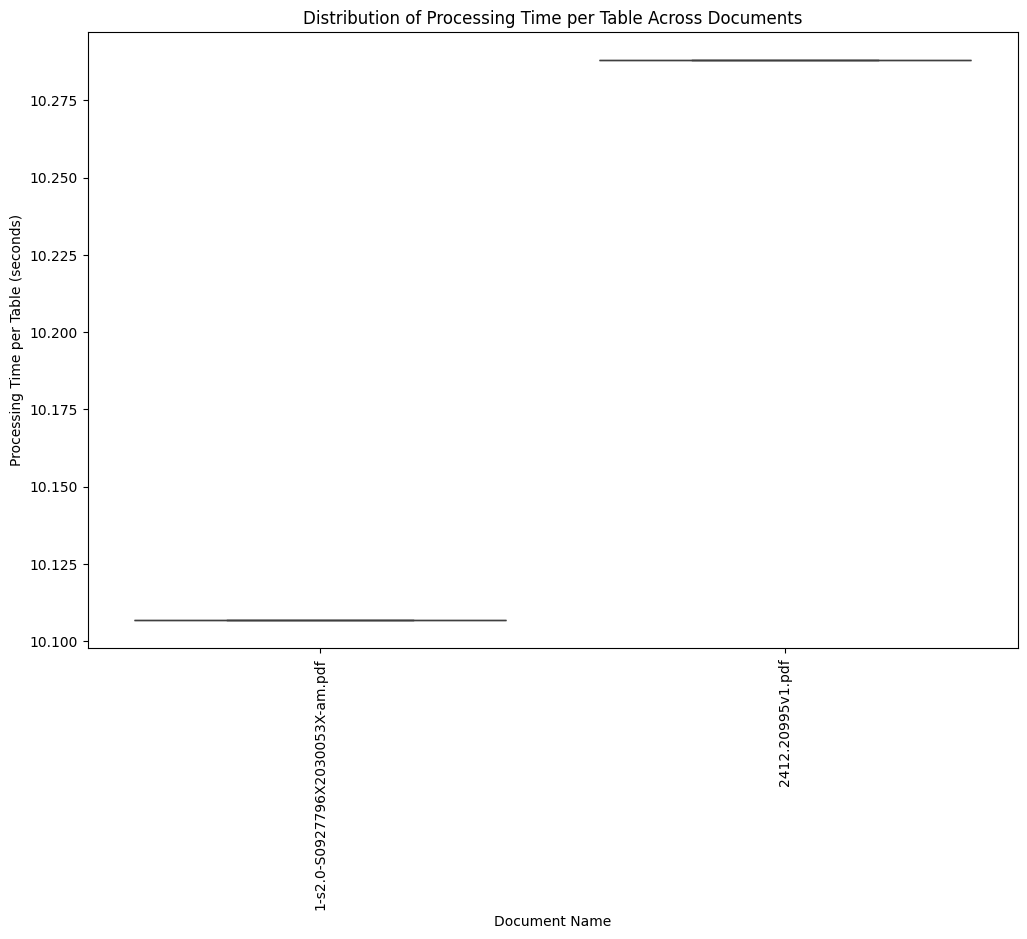

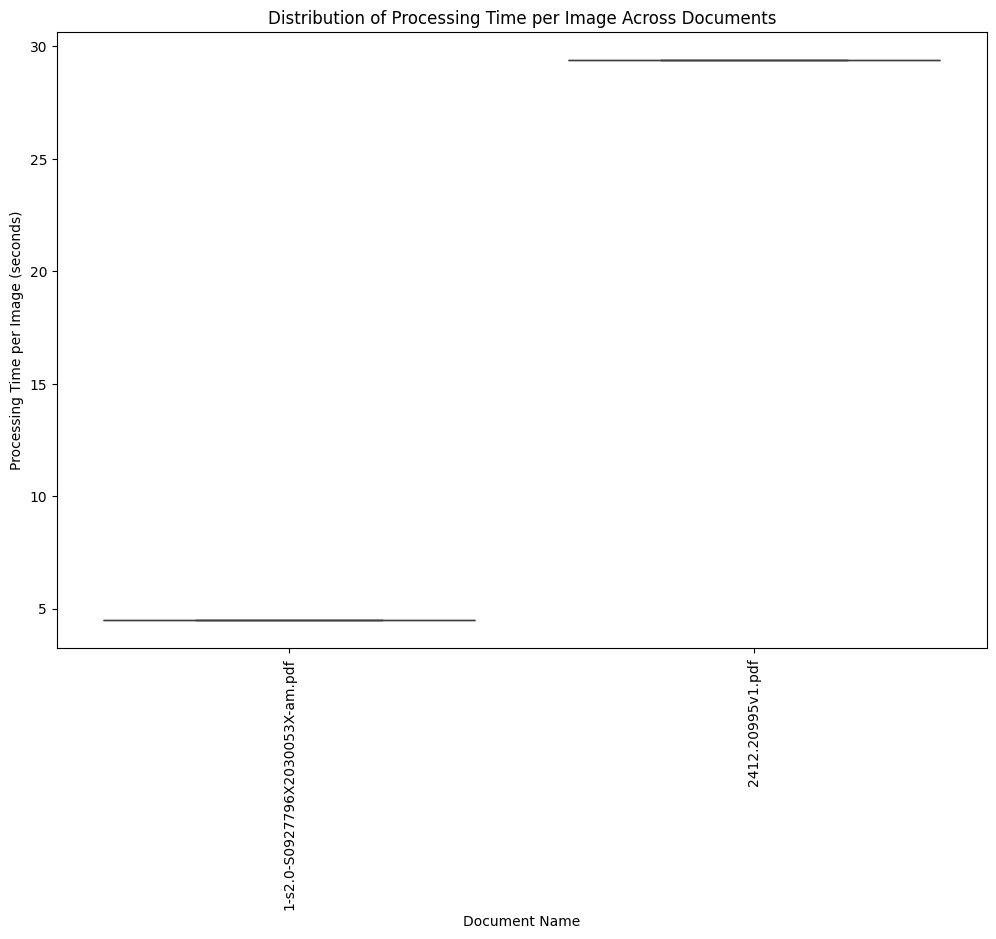

In [6]:
# Compare Document Processing

# Create comparative visualizations between documents showing processing efficiency and element extraction performance

# Bar plot comparing processing time per page for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_page', data=documents_df)
plt.title('Processing Time per Page for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Page (seconds)')
plt.xticks(rotation=90)
plt.show()

# Bar plot comparing processing time per nougat image for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_nougat_image', data=documents_df)
plt.title('Processing Time per Nougat Image for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Nougat Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Bar plot comparing processing time per table for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_table', data=documents_df)
plt.title('Processing Time per Table for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Table (seconds)')
plt.xticks(rotation=90)
plt.show()

# Bar plot comparing processing time per image for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_image', data=documents_df)
plt.title('Processing Time per Image for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per page across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_page', data=documents_df)
plt.title('Distribution of Processing Time per Page Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Page (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per nougat image across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_nougat_image', data=documents_df)
plt.title('Distribution of Processing Time per Nougat Image Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Nougat Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per table across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_table', data=documents_df)
plt.title('Distribution of Processing Time per Table Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Table (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per image across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_image', data=documents_df)
plt.title('Distribution of Processing Time per Image Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Evaluate Pipeline Efficiency
Calculate and visualize efficiency metrics like pages processed per minute, elements extracted per second, and identify potential bottlenecks in the processing pipeline.

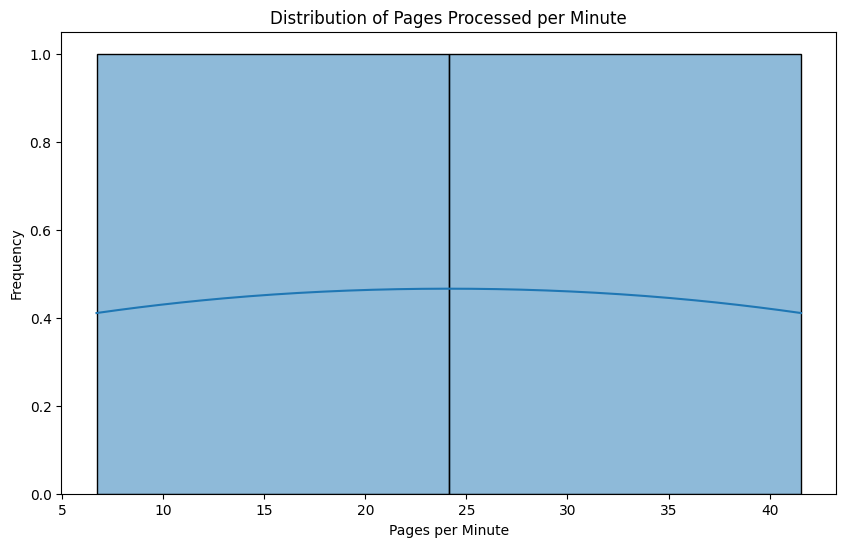

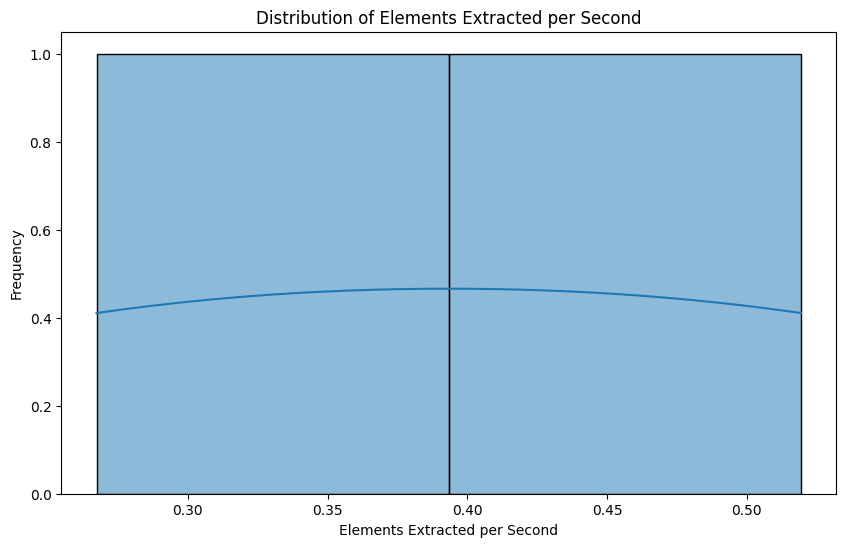

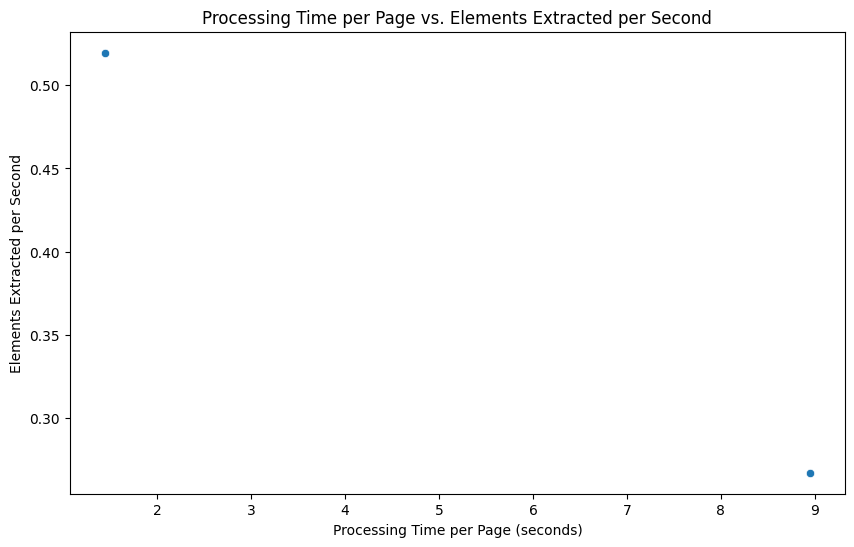

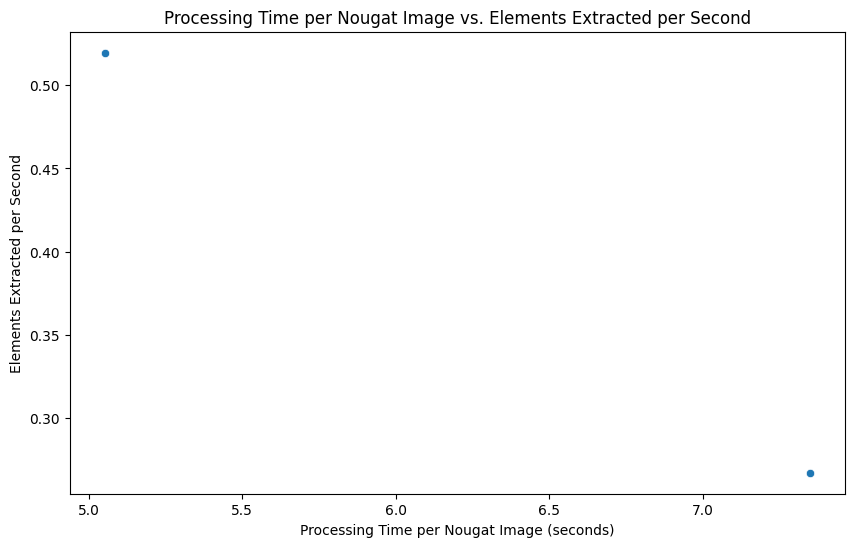

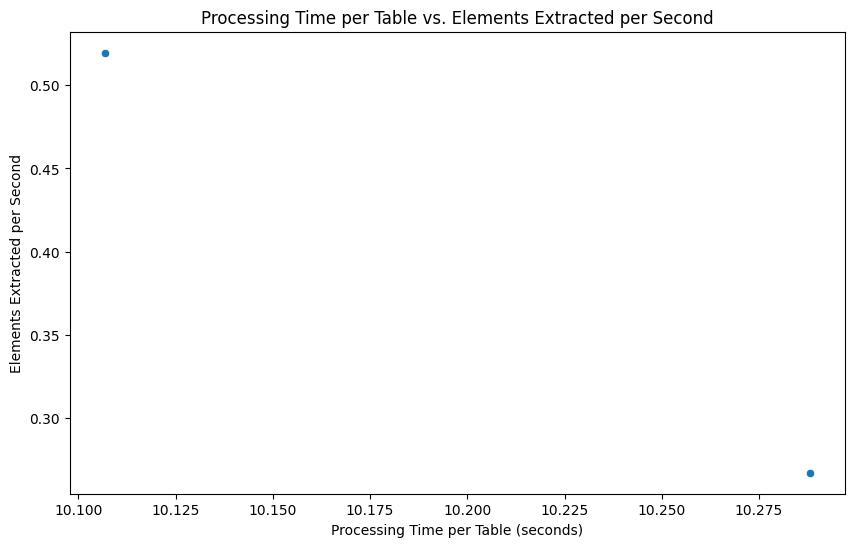

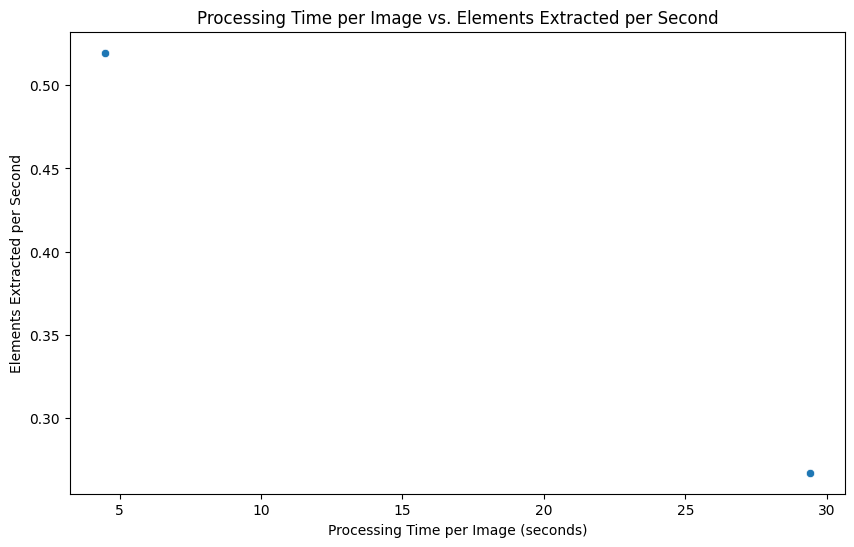

In [7]:
# Evaluate Pipeline Efficiency

# Calculate and visualize efficiency metrics like pages processed per minute, elements extracted per second, and identify potential bottlenecks in the processing pipeline.

# Calculate pages processed per minute
documents_df['pages_per_minute'] = documents_df['pages'] / (documents_df['processing_time_seconds'] / 60)

# Calculate elements extracted per second
documents_df['elements_extracted_per_second'] = (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images']) / documents_df['processing_time_seconds']

# Display the updated DataFrame with new efficiency metrics
documents_df.head()

# Plot the distribution of pages processed per minute
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['pages_per_minute'], kde=True)
plt.title('Distribution of Pages Processed per Minute')
plt.xlabel('Pages per Minute')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of elements extracted per second
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['elements_extracted_per_second'], kde=True)
plt.title('Distribution of Elements Extracted per Second')
plt.xlabel('Elements Extracted per Second')
plt.ylabel('Frequency')
plt.show()

# Identify potential bottlenecks by comparing processing time per page with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_page', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Page vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Page (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()

# Identify potential bottlenecks by comparing processing time per nougat image with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_nougat_image', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Nougat Image vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Nougat Image (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()

# Identify potential bottlenecks by comparing processing time per table with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_table', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Table vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Table (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()

# Identify potential bottlenecks by comparing processing time per image with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_image', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Image vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Image (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()